In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Baca Dataset

In [3]:
data_csv = pd.read_csv('diabetes.csv')

# Fitur dan Label

In [4]:
X = data_csv.drop(columns=["Outcome"])
y = data_csv["Outcome"]

# Split Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat Model

In [6]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# Evaluasi

In [7]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.7662337662337663
Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# Simpan Model

In [8]:
joblib.dump(model, "model_naive_bayes.pkl")
print("Model disimpan sebagai model_naive_bayes.pkl")

Model disimpan sebagai model_naive_bayes.pkl


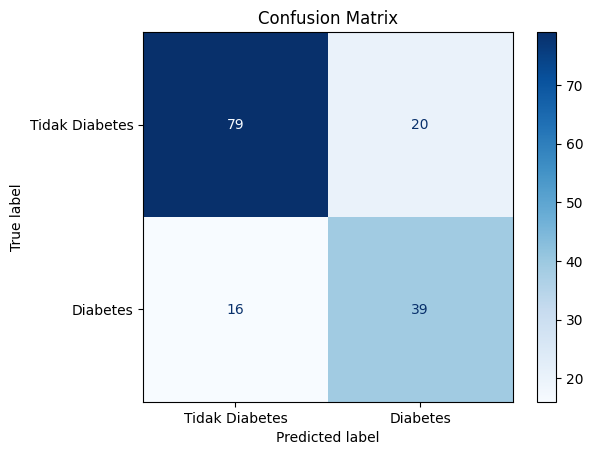

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()